# Testing ECDF implementations

## Initial test with ECDF

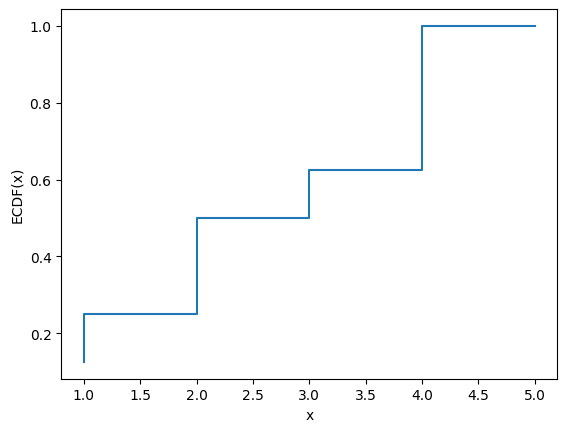

[1 2 2 3 4 4 4 5] [0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
data = [1, 2, 2, 3, 4, 4, 4, 5]

# Calculate the ECDF
def ECDF(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)

    # Plot the ECDF using matplotlib
    plt.step(x, y)
    plt.xlabel('x')
    plt.ylabel('ECDF(x)')
    plt.show()

    return x,y

x,y = ECDF(data=data)
print(x,y)



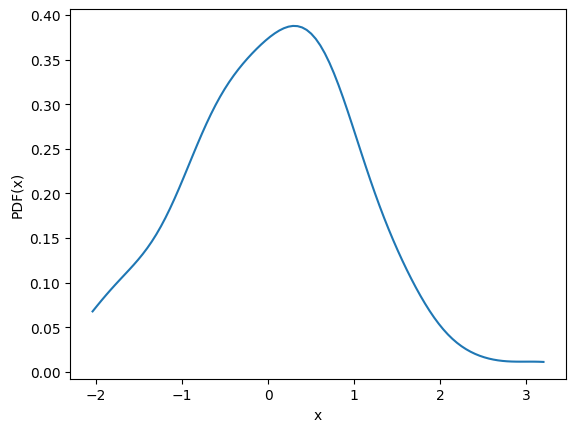

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate some example data
data = np.random.normal(loc=0, scale=1, size=100)

# Estimate the PDF using gaussian_kde
pdf = gaussian_kde(data)

# Evaluate the PDF at a range of x values
x = np.linspace(min(data), max(data), 100)
y = pdf(x)

# Plot the PDF using matplotlib
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.show()


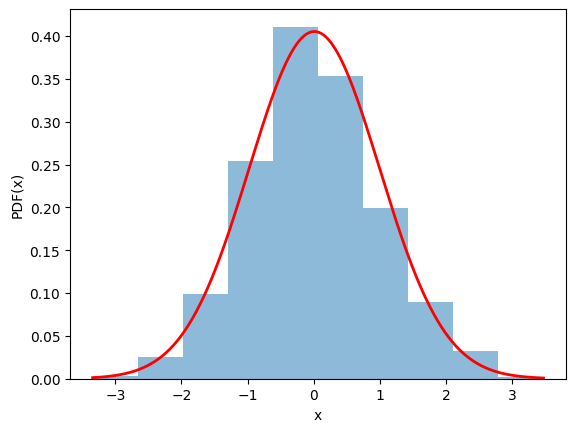

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
size = 10

# Generate some example data
data = np.random.normal(loc=0, scale=1, size=1000)
#data = np.random.exponential(scale=2, size=1000)


# Calculate the histogram using numpy.histogram
hist, bins = np.histogram(data, bins=10, density=True)

# Find the best-fit parameters for a normal distribution using scipy.stats.norm.fit
mu, sigma = norm.fit(data)

# Generate the normal distribution curve using scipy.stats.norm.pdf
x = np.linspace(min(data), max(data), 1000)
pdf = norm.pdf(x, mu, sigma)

# Plot the histogram and the normal distribution curve using matplotlib
plt.hist(data, bins=10, density=True, alpha=0.5)
plt.plot(x, pdf, 'r-', lw=2)
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.show()


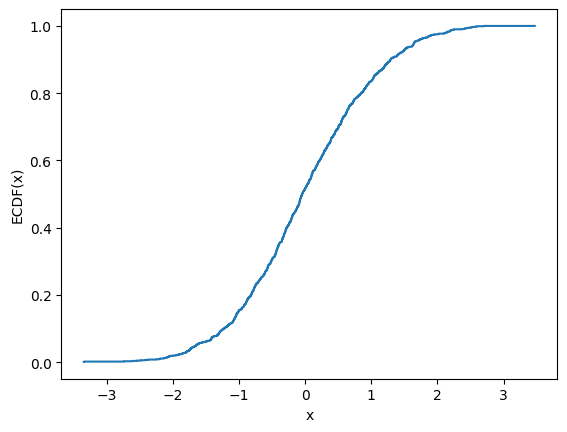

(array([-3.34348803e+00, -2.73761362e+00, -2.61286675e+00, -2.54156957e+00,
        -2.48097226e+00, -2.41246189e+00, -2.37090326e+00, -2.24578170e+00,
        -2.19775559e+00, -2.19297770e+00, -2.13692879e+00, -2.12539214e+00,
        -2.09063184e+00, -2.08929737e+00, -2.07525912e+00, -2.05822570e+00,
        -2.05141319e+00, -2.03743710e+00, -1.99919618e+00, -1.95365430e+00,
        -1.93791953e+00, -1.91232696e+00, -1.90089427e+00, -1.86612311e+00,
        -1.85733572e+00, -1.84576570e+00, -1.83552780e+00, -1.80602565e+00,
        -1.80059115e+00, -1.79042870e+00, -1.78923088e+00, -1.78670909e+00,
        -1.76606584e+00, -1.75478021e+00, -1.74692773e+00, -1.74420543e+00,
        -1.74037896e+00, -1.73805731e+00, -1.73494009e+00, -1.72553825e+00,
        -1.71938356e+00, -1.71542607e+00, -1.70417818e+00, -1.70184842e+00,
        -1.68572864e+00, -1.68210138e+00, -1.65855407e+00, -1.65094692e+00,
        -1.65008812e+00, -1.65004507e+00, -1.64482691e+00, -1.63607444e+00,
        -1.6

In [31]:
ECDF(data=data)

# DTW Function
Imported for testing.

In [2]:
import numpy as np
def dDTW(s1,s2):
    m = len(s1)                 # sequence 1 of size m
    n = len(s2)                 # sequence 2 of size n
    s1_bar = np.divide(s1,max(max(s1),max(s2)))
    s2_bar = np.divide(s2,max(max(s1),max(s2)))

    d = np.zeros((n+1,m+1))     # Distance matrix d. It has a size of (n+1)x(m+1).
    d[1:n+1:1,0] = np.inf
    d[0,1:m+1:1] = np.inf
    for i in range(1,n+1):
        for j in range(1,m+1):
            # we take the absolute distance between two points plus the minimum of the three values surronding it.
            d[i,j] = abs(s2_bar[i-1]-s1_bar[j-1])+min(d[i-1,j-1],d[i-1,j],d[i,j-1])
    # we divide the value of last cell with the max(n,m)
    dDTW_bar = d[n,m]/max(n,m)
    # validity index. Closer to 1 means less difference/distance between two sequences. Hence 1 means, the sequence is valid.
    dDTW = 1 - dDTW_bar         

    # print("cumulative distance = ", d[n,m])
    # print("distance matrix =\n",d)
    # print("validity index = ",dDTW)
    return(dDTW)


# Input validation - quasi Trace Driven Simulation (qTDS)

## Description

Description
In trace driven simulation (TDS) the same input data of the real system are fed to the simulator; then, a comparison of the output measures YR and YS is done. On the other hand, if the scope is the validation of the inputs, TDS is not suitable since, in this case, the mechanisms of input data generation are investigated. Hence, input data shall be generated through the same probability model that has been assumed (FS). In this case, comparing YR and YS directly might be a difficult task due to the innate noise of the Random Number Generation that makes YS totally uncorrelated from YR and not useful for any comparison when only a small dataset is available.

QTDS is based on the intuition that with correct assumptions on the inputs, the simulation output data will show a behavior very similar to the real system, allowing for the comparison of YR and YS. On the other hand, assuming a distribution that is not realistic will yield to significantly different outputs. QTDS simply generates random variates XS starting from FS that are highly correlated with the real system input datasets XR. Following are the steps for qTDS:

### Step 1: Calculate eCDF
We calculate emperical cumulative desity function from Xr (real data) with distribution Fr (real unknown distribution).

### Step 2: Calculate inverse transform u
Then inverse transform of the ecdf is used to obtain u which is an array of values ranging between 0 and 1 with the same randomness as the actual data set Xr. Slight deviation are possible due to the randomness generated in the uniform distribution used for generating the value.

To Understand: The cdf F  is a monotonically increasing function, it has an inverse; let us denote this by F<sup>−1</sup>. If F is the cdf of X, then F<sup>−1</sup>(α) is the value of x<sub>α</sub> such that P(X ≤ x<sub>α</sub>) = α.

### Step 3: Generate distribution
Here we are trying to generate data set Xs (digital data) by usingthe distribution parameters available in the digital model. As per qTDS, we use the randomness u along the generation to obtain the data set Xs. This is done by using the inverse CDF function of the respective distribution (with the distribution parameters from digital model and the randomness u).


## qTDS Function simplified & cleaned

### Variables explained

Distribution parameters explained:
- if distribution == 'norm':
    N_Parameter=2   # loc = mu, scale = sigma
    
- elif distribution == 'expon':
    N_Parameter=2   # loc = threshold or inital value, scale = scale/slope of exponential curve

- elif distribution == 'gamma':
    N_Parameter=3   # a = shape parameter, loc, scale

- elif distribution == 'erlang':
    N_Parameter=3   # a = shape parameter, loc, scale

- elif distribution == 'weibull_min':
    N_Parameter=3   # a = shape parameter beta or k, loc = gamma, scale = eta(n) or lambda

- elif distribution == 'weibull_max':
    N_Parameter=3   # a = shape parameter beta or k, loc = gamma, scale = eta(n) or lambda

- elif distribution == 'triang':
    N_Parameter=3   # a = shape or mode parameter, loc = minimum or start, scale = maximum or end

- elif distribution == 'lognorm':
    N_Parameter=3   # a threshold, scale = sigma

- elif distribution == 'beta':
    N_Parameter=4   # a,b = shape parameters, loc, scale
    
- else:
    print("Warning: Specified distribution type not found. Executing validation assuming an exponential distribution")
    N_Parameter=2   # loc = threshold or inital value, scale = scale/slope of exponential curve

### Functions

In [59]:
#####   Main input validation functions

# -----------------------------------------------------
# Libraries required
# -----------------------------------------------------
import numpy as np
# Respective SciPy libraries are imported inside the code.
# Access to dDTW function

# --------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------

def input_validation(a, b, loc, scale, distribution,Xr):
    # -----------------------------------------------------
    # Functions for eCDF and randomness
    # -----------------------------------------------------
    # Calculate the ECDF
    def ECDF(Xr):
        Xr_sorted = np.sort(Xr)
        ecdf = np.arange(1, (len(Xr_sorted)+1)) / len(Xr_sorted) # calculate ecdf
        return(ecdf)
    # Calculate randomness u
    def randomness(ecdf,umax):
        Xr_sorted = np.sort(Xr)
        u=np.array([])
        for ii in range(len(ecdf)):
            u=np.append(u,ecdf[np.asarray(np.where(Xr_sorted==Xr[ii]))])
        pos_one = np.where(u == 1.0)
        u[pos_one]=umax # change 1 to a value between 0.96 and 0.9999 to avoid infinity in dist.ppf function
        return(u,pos_one)

    # -----------------------------------------------------
    # Function for Generating dedicated disrtibutions
    # -----------------------------------------------------
    # we mention the number of parameters used to define the distribution as N_Parameter

    # Importing required library from SciPy. # parameters explained adjacent to it.
    if distribution == 'norm':
        from scipy.stats import norm as dist
        N_Parameter=2   # loc = mean,mu scale = standard deviation,sigma
    elif distribution == 'expon':
        from scipy.stats import expon as dist
        N_Parameter=2   # loc = threshold or inital value, scale = scale/slope of exponential curve
    elif distribution == 'gamma':
        from scipy.stats import gamma as dist
        N_Parameter=3   # a = shape parameter, loc, scale
    elif distribution == 'erlang':
        from scipy.stats import erlang as dist
        N_Parameter=3   # a = shape parameter, loc, scale
    elif distribution == 'weibull_min':
        from scipy.stats import weibull_min as dist
        N_Parameter=3   # a = shape parameter beta or k, loc = gamma, scale = eta(n) or lambda
    elif distribution == 'weibull_max':
        from scipy.stats import weibull_max as dist
        N_Parameter=3   # a = shape parameter beta or k, loc = gamma, scale = eta(n) or lambda
    elif distribution == 'triang':
        from scipy.stats import triang as dist
        N_Parameter=3   # a = shape or mode parameter, loc = minimum or start, scale = maximum or end
    elif distribution == 'lognorm':
        from scipy.stats import lognorm as dist
        N_Parameter=3   # a threshold, scale = sigma
    elif distribution == 'beta':
        from scipy.stats import beta as dist
        N_Parameter=4   # a,b = shape parameters, loc, scale
    else:
        print("Warning: Specified distribution type not found. Executing validation assuming an exponential distribution")
        from scipy.stats import expon as dist
        N_Parameter=2   # loc = threshold or inital value, scale = scale/slope of exponential curve

    # defining required arrays
    Xsf=np.array([])
    Xs=np.array([])
    diff=np.zeros(403)
    diff[402]=np.inf
    umax=np.zeros(402)

    # Deriving randomness from Xr and generating Xs
    # We iterate for chaning the largest value in CDF to obtain a value very close to 1, but not 1.
    # 1 in eCDF makes the ppf to give inf value.
    for ii in range(401,0,-1):      # we approach from 1 to the lesser value of umax till 0.9599
        umax[ii]=0.91+((ii+498)*0.0001) # to generate values between 0.9999 and 0.9599.
        Xsf=Xs  # storing memory of last iteration

        if N_Parameter==2:  # for distributions with 2 parameters
            u,pos_one = randomness(ECDF(Xr),umax[ii]) # calculate inverse transform of ecdf.
            Xs = dist.ppf(u, loc, scale)    # generate distribution Xs.

        if N_Parameter==3:  # for distributions with 3 parameters
            u,pos_one = randomness(ECDF(Xr),umax[ii]) # calculate inverse transform of ecdf.
            Xs = dist.ppf(u, a, loc, scale)    # generate distribution Xs.

        if N_Parameter==4:  # for distributions with 4 parameters
            u,pos_one = randomness(ECDF(Xr),umax[ii]) # calculate inverse transform of ecdf.
            Xs = dist.ppf(u, a, b, loc, scale)    # generate distribution Xs.

        diff[ii]=abs(Xs[pos_one]-Xr[pos_one])   # Calculate error in the highest value due to impact of umax
        
        # we break the iteration when we reach the minimum difference between the peaks of real and digital data
        if diff[ii]>diff[ii+1]:
            Xs=Xsf  # We get the Xs value of the previous iteration as that corresponsd to the minimum value of umax
            break
    
    Validity_Index = dDTW(Xr,Xs)    # DTW for sequence comparison and vaildity inspection
    return(Xr,Xs,Validity_Index)

### Input Data

In [78]:
#### Input data
a, b, loc, scale = 0, 0, 2, 0.5  # use only generalised parameters (a, b, loc, scale)
size = 10
distribution = 'norm'  # we define the required distribution here as a string

# Fake data as an alternate of real data from eventlog
from scipy.stats import norm as dist    # Change the import library based on the distribution  
Xr = dist.rvs(loc, scale, size=size)    # Xr not to be generated. To be obtained from event log of real system.


#### calling the function
Xr1, Xs, validity = input_validation(a,b,loc,scale,distribution,Xr)
print(validity,len(Xs))

0.9449726663805026 10


## Testing Modules

#### replace 1

In [153]:
# replace 1

a=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
indices = np.where(a == 1.0)
a[indices]=0.9999
print(np.asarray(indices))
print(a)

[[9]]
[0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9    0.9999]


#### finding value to replace 1

In [87]:
#####   Main input validation function
def input_validation(a, b, loc, scale, size, distribution,Xr,umax):
    import matplotlib.pyplot as plt
    # -----------------------------------------------------
    # Main functions
    # -----------------------------------------------------
    import numpy as np
    # Calculate the ECDF
    def ECDF(Xr):
        Xr_sorted = np.sort(Xr)
        ecdf = np.arange(1, (len(Xr_sorted)+1)) / len(Xr_sorted) # calculate ecdf
        return(ecdf)
    # Calculate randomness u
    def randomness(ecdf,umax):
        Xr_sorted = np.sort(Xr)
        u=np.array([])
        for ii in range(len(ecdf)):
            u=np.append(u,ecdf[np.asarray(np.where(Xr_sorted==Xr[ii]))])
        # print(len(ecdf))
        pos_one = np.where(u == 1.0)
        u[pos_one]=umax # change 1 to 0.99 to avoid infinity in dist.ppf function
        return(u,pos_one)

    # -----------------------------------------------------
    # Function for Generating dedicated disrtibutions
    # -----------------------------------------------------
    # we mention the number of parameters used to define the distribution as N_Parameter
    if distribution == 'norm':
        from scipy.stats import norm as dist
        N_Parameter=2   # loc = mu, scale = sigma
    elif distribution == 'expon':
        from scipy.stats import expon as dist
        N_Parameter=2   # loc = threshold or inital value, scale = scale/slope of exponential curve
    elif distribution == 'gamma':
        from scipy.stats import gamma as dist
        N_Parameter=3   # a = shape parameter, loc, scale
    elif distribution == 'erlang':
        from scipy.stats import erlang as dist
        N_Parameter=3   # a = shape parameter, loc, scale
    elif distribution == 'weibull_min':
        from scipy.stats import weibull_min as dist
        N_Parameter=3   # a = shape parameter beta or k, loc = gamma, scale = eta(n) or lambda
    elif distribution == 'weibull_max':
        from scipy.stats import weibull_max as dist
        N_Parameter=3   # a = shape parameter beta or k, loc = gamma, scale = eta(n) or lambda
    elif distribution == 'triang':
        from scipy.stats import triang as dist
        N_Parameter=3   # a = shape or mode parameter, loc = minimum or start, scale = maximum or end
    elif distribution == 'lognorm':
        from scipy.stats import lognorm as dist
        N_Parameter=3   # a threshold, scale = sigma
    elif distribution == 'beta':
        from scipy.stats import beta as dist
        N_Parameter=4   # a,b = shape parameters, loc, scale
    else:
        print("Warning: Specified distribution type not found. Executing validation assuming an exponential distribution")
        from scipy.stats import expon as dist
        N_Parameter=2   # loc = threshold or inital value, scale = scale/slope of exponential curve

    if N_Parameter==2:
        # Generating real and digital data
        # Xr = dist.rvs(loc, scale, size=size)   # Generating real data Xr.
        u,pos_one = randomness(ECDF(Xr),umax) # calculate inverse transform of ecdf.
        Xs = dist.ppf(u, loc, scale)    # generate distribution Xs.

    if N_Parameter==3:
        # Generating real and digital data
        # Xr = dist.rvs(a, loc, scale, size=size)   # Generating real data Xr.
        u,pos_one = randomness(ECDF(Xr),umax) # calculate inverse transform of ecdf.
        Xs = dist.ppf(u, a, loc, scale)    # generate distribution Xs.

    if N_Parameter==4:
        # Generating real and digital data
        # Xr = dist.rvs(a, b, loc, scale, size=size)   # Generating real data Xr.
        u,pos_one = randomness(ECDF(Xr),umax) # calculate inverse transform of ecdf.
        Xs = dist.ppf(u, a, b, loc, scale)    # generate distribution Xs.

    # -----------------------------------------------------
    # Generation results and Validity index
    # -----------------------------------------------------
    # Generation results - can be commented if not required.
    i = np.arange(1,len(Xr)+1,1)
    # plt.hist(Xr)
    # plt.hist(Xs)
    # plt.show
    # print(len(Xr))
    # plt.figure()
    # plt.plot(i, Xr, color='blue')
    # plt.plot(i, Xs, color='red')
    # plt.xlabel('i')
    # plt.ylabel('Xr Xs')
    # plt.legend(["Xr","Xs"])
    # plt.show()
    # print("mu_real = ",np.mean(Xr),"sigma_real = ",np.std(Xr))
    # print("mu_digital = ",np.mean(Xs),"sigma_digital = ",np.std(Xs))
    Validity_Index = dDTW(Xr,Xs)    # DTW for sequence comparison and vaildity inspection - final output
    # print("Validity Index = ",Validity_Index)

    diff=Xs[pos_one]-Xr[pos_one]

    return(Xr,Xs,Validity_Index,diff)


#   ---------------------------------------------------------------------------------------------
#   ---------------------------------------------------------------------------------------------

##### Taking Xr, Xs, u, pos_one
import numpy as np
import matplotlib.pyplot as plt
# parameters inside the digital model
a, loc, scale = 0, 200, 100  # use only generalised parameters (a, b, loc, scale)
size = 10
distribution = 'expon'
from scipy.stats import expon as dist # we define the required distribution here as a string
Xr = dist.rvs(loc, scale, size=size)
diff_range=np.zeros(899)
umax_range=np.zeros(899)
sse_range=np.zeros(899)


        


for ii in range (0,899):
    umax=0.91+(ii*0.0001)

    Xr, Xs, validity, diff = input_validation(a,0,loc,scale,size,distribution,Xr,umax)
    diff_range[ii]=diff
    umax_range[ii]=umax
    sse_range[ii]=np.sum(np.square(Xr-Xs))
    
print(min(umax_range[499:899]))
plt.plot(umax_range,abs(diff_range))
plt.show
plt.figure()
plt.plot(umax_range,sse_range)

In [150]:
print(0.91+(899*0.0001))
len(umax_range)

0.9999


899

#### testing final code for validation final function

In [79]:
#####   Main input validation functions

# -----------------------------------------------------
# Libraries required
# -----------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
# Respective SciPy libraries are imported inside the code.
# Access to dDTW function

# --------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------

def input_validation(a, b, loc, scale, distribution,Xr):
    # -----------------------------------------------------
    # Functions for eCDF and randomness
    # -----------------------------------------------------
    import numpy as np
    # Calculate the ECDF
    def ECDF(Xr):
        Xr_sorted = np.sort(Xr)
        ecdf = np.arange(1, (len(Xr_sorted)+1)) / len(Xr_sorted) # calculate ecdf
        return(ecdf)
    # Calculate randomness u
    def randomness(ecdf,umax):
        Xr_sorted = np.sort(Xr)
        u=np.array([])
        for ii in range(len(ecdf)):
            u=np.append(u,ecdf[np.asarray(np.where(Xr_sorted==Xr[ii]))])
        # print(len(ecdf))
        pos_one = np.where(u == 1.0)
        u[pos_one]=umax # change 1 to 0.99 to avoid infinity in dist.ppf function
        return(u,pos_one)

    # -----------------------------------------------------
    # Function for Generating dedicated disrtibutions
    # -----------------------------------------------------
    # we mention the number of parameters used to define the distribution as N_Parameter

    # Importing required library from SciPy
    if distribution == 'norm':
        from scipy.stats import norm as dist
        N_Parameter=2   # loc = mu, scale = sigma
    elif distribution == 'expon':
        from scipy.stats import expon as dist
        N_Parameter=2   # loc = threshold or inital value, scale = scale/slope of exponential curve
    elif distribution == 'gamma':
        from scipy.stats import gamma as dist
        N_Parameter=3   # a = shape parameter, loc, scale
    elif distribution == 'erlang':
        from scipy.stats import erlang as dist
        N_Parameter=3   # a = shape parameter, loc, scale
    elif distribution == 'weibull_min':
        from scipy.stats import weibull_min as dist
        N_Parameter=3   # a = shape parameter beta or k, loc = gamma, scale = eta(n) or lambda
    elif distribution == 'weibull_max':
        from scipy.stats import weibull_max as dist
        N_Parameter=3   # a = shape parameter beta or k, loc = gamma, scale = eta(n) or lambda
    elif distribution == 'triang':
        from scipy.stats import triang as dist
        N_Parameter=3   # a = shape or mode parameter, loc = minimum or start, scale = maximum or end
    elif distribution == 'lognorm':
        from scipy.stats import lognorm as dist
        N_Parameter=3   # a threshold, scale = sigma
    elif distribution == 'beta':
        from scipy.stats import beta as dist
        N_Parameter=4   # a,b = shape parameters, loc, scale
    else:
        print("Warning: Specified distribution type not found. Executing validation assuming an exponential distribution")
        from scipy.stats import expon as dist
        N_Parameter=2   # loc = threshold or inital value, scale = scale/slope of exponential curve

    # defining required arrays
    Xsf=np.array([])
    Xs=np.array([])
    diff=np.zeros(901)
    diff[900]=np.inf
    umax=np.zeros(900)
    sse=np.zeros(900)

    # Deriving randomness from Xr and generating Xs
    for ii in range(899,498,-1):
        umax[ii]=0.91+(ii*0.0001)
        Xsf=Xs

        if N_Parameter==2:  # for distributions with 2 parameters
            u,pos_one = randomness(ECDF(Xr),umax[ii]) # calculate inverse transform of ecdf.
            Xs = dist.ppf(u, loc, scale)    # generate distribution Xs.

        if N_Parameter==3:  # for distributions with 3 parameters
            u,pos_one = randomness(ECDF(Xr),umax[ii]) # calculate inverse transform of ecdf.
            Xs = dist.ppf(u, a, loc, scale)    # generate distribution Xs.

        if N_Parameter==4:  # for distributions with 4 parameters
            u,pos_one = randomness(ECDF(Xr),umax[ii]) # calculate inverse transform of ecdf.
            Xs = dist.ppf(u, a, b, loc, scale)    # generate distribution Xs.

        diff[ii]=abs(Xs[pos_one]-Xr[pos_one])   # Calculate error in the highest value due to impact of umax
        sse[ii]=np.sum(np.square(Xr-Xs))
        
        if diff[ii]>diff[ii+1]:
            Xs=Xsf
            break

    Validity_Index = dDTW(Xr,Xs)    # DTW for sequence comparison and vaildity inspection - final output
    return(Xr,Xs,Validity_Index)






In [99]:
#### Input data
a, b, loc, scale = 0, 0, 2, 0.5  # use only generalised parameters (a, b, loc, scale)
size = 30
distribution = 'norm'  # we define the required distribution here as a string
from scipy.stats import norm as dist   # Change the import library based on the distribution  
Xr = dist.rvs(loc, scale, size=size)
#### calling the function
Xr1, Xs, validity = input_validation(a,b,loc,scale,distribution,Xr)
print(validity,len(Xs))

0.9664705554603813 30


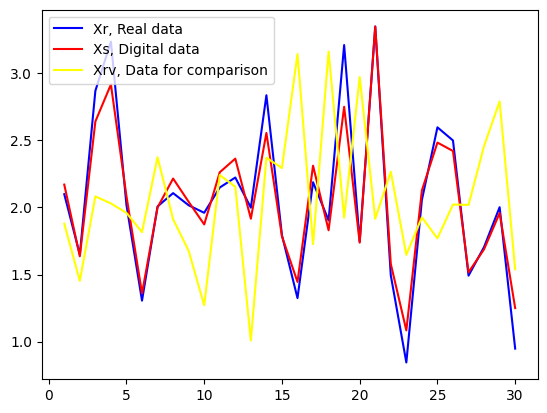

In [100]:
#### Validating the functions
Xrv = dist.rvs(loc, scale, size=size)
# plotting Xr, Xs and Xrv for validation
i=range(1,len(Xr)+1)
plt.plot(i,Xr,color='blue')
plt.plot(i,Xs,color='red')
plt.plot(i,Xrv,color='yellow')
plt.legend(["Xr, Real data","Xs, Digital data","Xrv, Data for comparison"])